# Plotly Offline

Plotly Offline brings interactive Plotly graphs to the offline (local) environment. 

Instead of saving the graphs to a server, your data and graphs will remain in your local system.
When your ready to share, you can just publish them to the web with an online [Plotly account](https://plot.ly/feed) or to your company's internal [Plotly Enterprise](https://plot.ly/product/enterprise).

To get started with Plotly Offline, upgrade to the `1.9.x` series or higher:

In [1]:
! pip install plotly --upgrade

Requirement already up-to-date: plotly in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages
Requirement already up-to-date: requests in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages (from plotly)
Requirement already up-to-date: six in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages (from plotly)
Requirement already up-to-date: pytz in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages (from plotly)


In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print __version__ # requires version >= 1.9.0

1.11.0


## Running Plotly offline from Command Line
You can plot your graphs from a python script from command line. On executing the script, it will open a web browser with your Plotly Graph drawn.

In [3]:
from plotly.graph_objs import Bar, Scatter, Figure, Layout

plot([Scatter(x=[1, 2, 3], y=[3, 1, 6])])

'file:///Users/home/GitHub/documentation/_posts/python/offline/temp-plot.html'

## Static Image Export
The graphs generated from Plotly Offline can also be saved as an Image, as shown below:

In [20]:
import plotly.plotly as py
# Generate the figure

trace = Bar(x=[1,2,3],y=[4,5,6])
data = [trace]
layout = Layout(title='My Plot')
fig = Figure(data=data,layout=layout)

# Save the figure as a png image:
py.image.save_as(fig, 'my_plot.png')

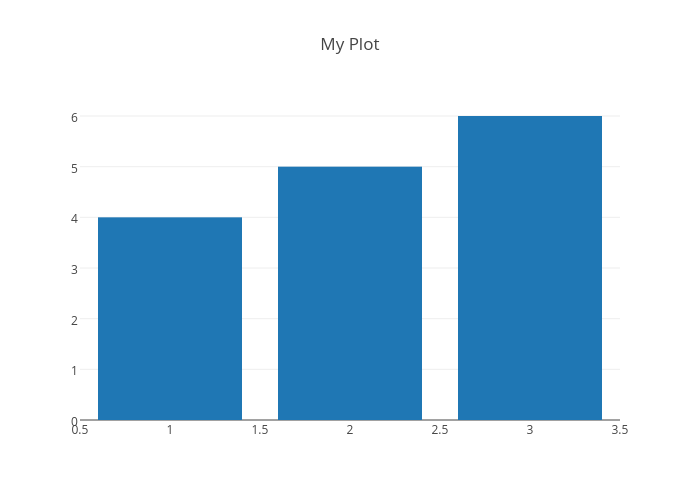

In [21]:
from IPython.display import Image
Image(filename='my_plot.png') 

## Generating Offline Graphs withing Jupyter Notebook
You can also plot your graphs offline inside a Jupyter Notebook Environment. First you need to initiate the Plotly Notebook mode as below:

In [22]:
init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook

In [23]:
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])

In [24]:
from plotly.graph_objs import *
import numpy as np

In [25]:
iplot([Box(y = np.random.randn(50), showlegend=False) for i in range(45)], show_link=False)

In [26]:
x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

In [36]:
# Plotting with Pandas

import pandas as pd
df = pd.read_csv('https://plot.ly/~etpinard/191.csv')

In [28]:
iplot({
    'data': [
        Scatter(x=df[continent+'_Life Expentancy [in years]'],
                y=df[continent+'_Gross Domestic Product per Capita [in USD of the year 2000]'],
                text=df[continent+'_text'],
                marker=Marker(size=df[continent+'_marker.size'], sizemode='area', sizeref=131868,),
                mode='markers',
                name=continent) for continent in ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
    ],
    'layout': Layout(xaxis=XAxis(title='Life Expectancy'), yaxis=YAxis(title='GDP per Capita', type='log'))
}, show_link=False)

In [29]:
import cufflinks as cf

In [30]:
iplot(cf.datagen.lines().iplot(asFigure=True,
                               kind='scatter',xTitle='Dates',yTitle='Returns',title='Returns'))

In [31]:
iplot(cf.datagen.heatmap(20,20).iplot(asFigure=True,
                                      kind='heatmap',colorscale='spectral',title='Cufflinks - Heatmap'))

In [32]:
import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'],
        lat = df_airports['lat'],
        hoverinfo = 'text',
        text = df_airports['airport'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        
flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )
    
layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False, 
        height = 800,
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict( data=flight_paths + airports, layout=layout )

iplot(fig)

In [33]:
import plotly.plotly as py # all methods in plotly.plotly will communicate with a Plotly Cloud or Plotly Enterprise

# get_figure downloads a figure from plot.ly or Plotly Enterprise. 
# You need to provide credentials to download figures: https://plot.ly/python/getting-started/
fig = py.get_figure('https://plot.ly/~jackp/8715', raw=True)
iplot(fig)

In [38]:
from IPython.display import display, HTML

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="http://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

! pip install git+https://github.com/plotly/publisher.git --upgrade
    
import publisher
publisher.publish(
    'plotly_offline.ipynb', 'python/offline/', 'Plotly Offline for IPython Notebooks',
    'How to use Plotly offline inside IPython notebooks with Plotly Offline',
    title= 'Plotly Offline for IPython Notebooks',
    name = 'Offline Plots in Plotly',
    has_thumbnail='False', 
    language='python', page_type='example_index')

  Cloning https://github.com/plotly/publisher.git to /var/folders/j3/gt_q6y096cjfts4q8zq2dm2c0000gn/T/pip-WfWGNq-build
  Found existing installation: publisher 0.10
    Uninstalling publisher-0.10:
      Successfully uninstalled publisher-0.10
  Running setup.py install for publisher
